# The imshow wrapper

To simplify the use of Matplotlib's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function, **teareduce** includes a wrapper that automatically adds a colorbar. This is especially useful when analyzing astronomical images. Additionally, for wavelength-calibrated spectroscopic exposures, it allows the wavelength scale to be displayed on the horizontal axis.

Download the following file:

- https://guaix.fis.ucm.es/~tea/teareduce-cookbook-data/imshow/wcftdz_45330.fits

In [1]:
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt
import teareduce as tea

We read the sample image.

In [2]:
with fits.open('wcftdz_45330.fits') as hdul:
    header = hdul[0].header
    data = hdul[0].data

This image is wavelength calibrated.

In [3]:
for key in ['CRPIX1', 'CRVAL1', 'CDELT1', 'CUNIT1']:
    print(f'{key}: {header[key]}')

CRPIX1: 1.0
CRVAL1: 6.502e-07
CDELT1: 3.9e-11
CUNIT1: m


## Simple usage

With a single instruction we can display the data array, including a colorbar and automatic labels. For that purpose we can employ the auxiliary `imshowme()` function.

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='X axis (array index)', ylabel='Y axis (array index)'>,
 <matplotlib.image.AxesImage at 0x11dc8c1a0>)

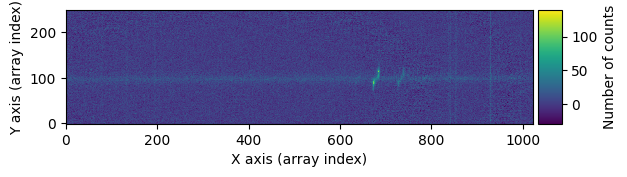

In [4]:
tea.imshowme(data)

This function is actually calling the `tea.imshow()` function described next by setting default values for the Figure and Axis objects.

## Setting the figure size

It is possible to transfer user-defined Figure and Axis instances.

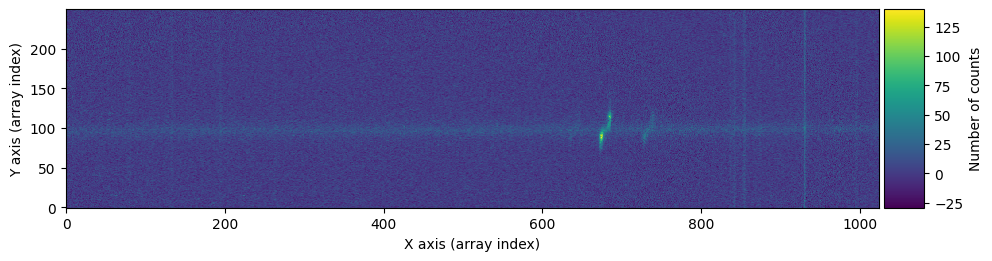

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
tea.imshow(fig, ax, data)
plt.tight_layout()

By default, the image is displayed using `aspect='equal'`. This can be easily modified:

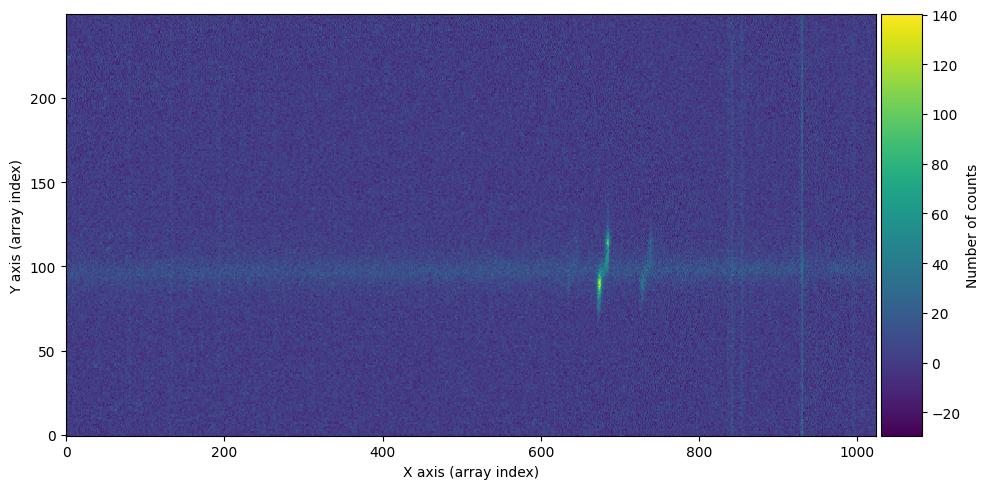

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
tea.imshow(fig, ax, data, aspect='auto')
plt.tight_layout()

## Displaying the wavelength 

For images calibrated in wavelength, we can specify the keywords that contain the corresponding information. This allows the figure to display a wavelength scale on the bottom horizontal axis, showing in this case the array index scale on the top horizontal axis. The units on the wavelength axis may differ from those used in the wavelength calibration.

In [7]:
cunit1 = u.Unit(header['cunit1'])
crpix1 = header['crpix1'] * u.pix
crval1 = header['crval1'] * cunit1
cdelt1 = header['cdelt1'] * cunit1 / u.pix

print(f'{cunit1=}\n{crpix1=}\n{crval1=}\n{cdelt1=}')

cunit1=Unit("m")
crpix1=<Quantity 1. pix>
crval1=<Quantity 6.502e-07 m>
cdelt1=<Quantity 3.9e-11 m / pix>


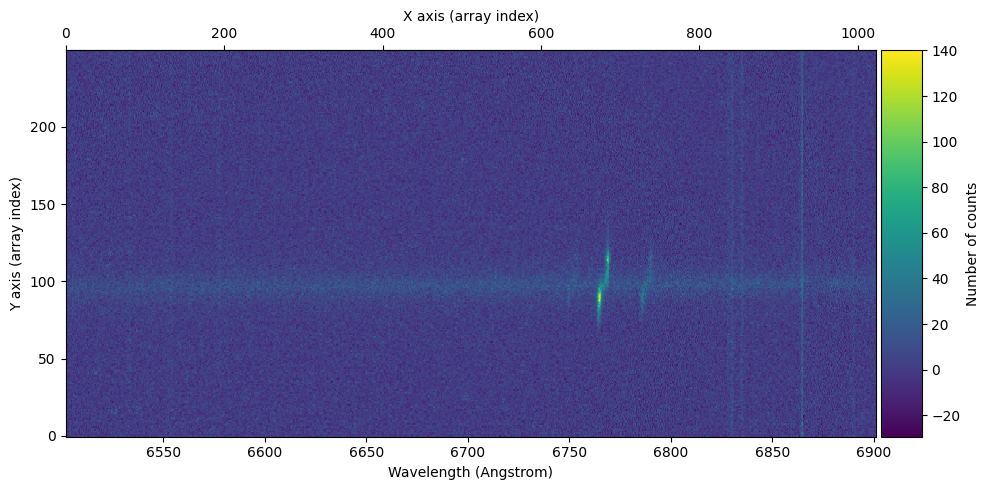

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
tea.imshow(fig, ax, data,
           crpix1=crpix1,
           crval1=crval1,
           cdelt1=cdelt1,
           cunit1=cunit1,
           cunitx=u.Angstrom
          )
plt.tight_layout()

## Function documentation

Note that keyword arguments not defined in the `tea.imshow()` are passed to the original Matplotlib `imshow()` function.

In [9]:
help(tea.imshow)

Help on function imshow in module teareduce.imshow:

imshow(fig=None, ax=None, data=None, crpix1=1, crval1=None, cdelt1=None, cunit1=None, cunitx=Unit("Angstrom"), xlabel=None, ylabel=None, title=None, colorbar=True, cblabel='Number of counts', **kwargs)
    Call imshow() with color bar and default labels.

    If crpix1, crval1, cdelt1 and cunit1 are not None, a wavelengh
    scale is also displayed. In this case, the colorbar is not shown
    because there is a conflict (to be solved).

    Parameters
    ----------
    fig : matplotlib.figure.Figure
        Instance of Figure.
    ax : matplotlib.axes.Axes
        Instance of Axes.
    data : numpy array
        2D array to be displayed.
    crpix1 : astropy.units.Quantity
        Float number providing the CRPIX1 value: the reference pixel
        for which CRVAL1 is given.
    crval1 : astropy.units.Quantity
        Float number providing the CRVAL1 value: wavelength at the
        center of the first pixel.
    cdelt1 : astropy.u